In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('training_data_with_weather_info_week_4.csv')

In [3]:
df.head()

,Id,Country_Region,Province_State,Date,ConfirmedCases,Fatalities,country+province,Lat,Long,day_from_jan_first,...,min,max,stp,slp,dewp,rh,ah,wdsp,prcp,fog
0,1,Afghanistan,NaN,2020-01-22,0.0,0.0,Afghanistan-,33.0,65.0,22,...,33.6,54.9,999.9,1024.3,27.4,0.545709,0.186448,9.4,0.00,0
1,2,Afghanistan,NaN,2020-01-23,0.0,0.0,Afghanistan-,33.0,65.0,23,...,32.7,55.9,999.9,1020.8,22.8,0.461259,0.163225,14.9,99.99,1
2,3,Afghanistan,NaN,2020-01-24,0.0,0.0,Afghanistan-,33.0,65.0,24,...,36.9,43.2,999.9,1018.6,34.5,0.801794,0.325375,10.4,0.17,1
3,4,Afghanistan,NaN,2020-01-25,0.0,0.0,Afghanistan-,33.0,65.0,25,...,37.9,56.3,999.9,1018.0,37.8,0.728175,0.214562,6.1,0.57,1
4,5,Afghanistan,NaN,2020-01-26,0.0,0.0,Afghanistan-,33.0,65.0,26,...,36.1,53.1,999.9,1014.8,33.2,0.685513,0.231656,10.8,0.00,1


In [4]:
countryByTemperature = df.groupby('Country_Region')['temp'].mean()
sorted_country = countryByTemperature.sort_values()
pd.set_option('display.max_rows', None)

print(sorted_country)

Country_Region
Russia                              17.735897
Canada                              18.103098
Mongolia                            20.391026
Slovakia                            21.230769
Kazakhstan                          26.141026
Kyrgyzstan                          26.241026
Switzerland                         27.408974
Armenia                             28.620513
Finland                             32.178205
Denmark                             33.032051
Andorra                             34.702564
Estonia                             34.876923
Belarus                             35.547436
Afghanistan                         35.579487
Austria                             35.939744
Latvia                              37.523077
Lithuania                           37.588462
Sweden                              37.594872
Turkey                              38.588462
Romania                             38.973077
Ukraine                             39.329487
Poland             

In [5]:
# Adding a 'Continent' column

continent_map_df = pd.read_csv('Continents.csv') #countries and their respective continents
merged_df = pd.merge(countryByTemperature, continent_map_df, on='Country_Region', how='left')

merged_df

,Country_Region,temp,Continent
0,Afghanistan,35.579487,Asia
1,Albania,52.632051,Europe
2,Algeria,70.260256,Africa
3,Andorra,34.702564,Europe
4,Angola,82.639744,Africa
5,Antigua and Barbuda,77.465385,North America
6,Argentina,71.046154,South America
7,Armenia,28.620513,Asia
8,Australia,70.576763,Oceania
9,Austria,35.939744,Europe


<font face="Arial" size="5.5"> DISTRIBUTION OF AVG. TEMPERATURE BY CONTINENT: </font>

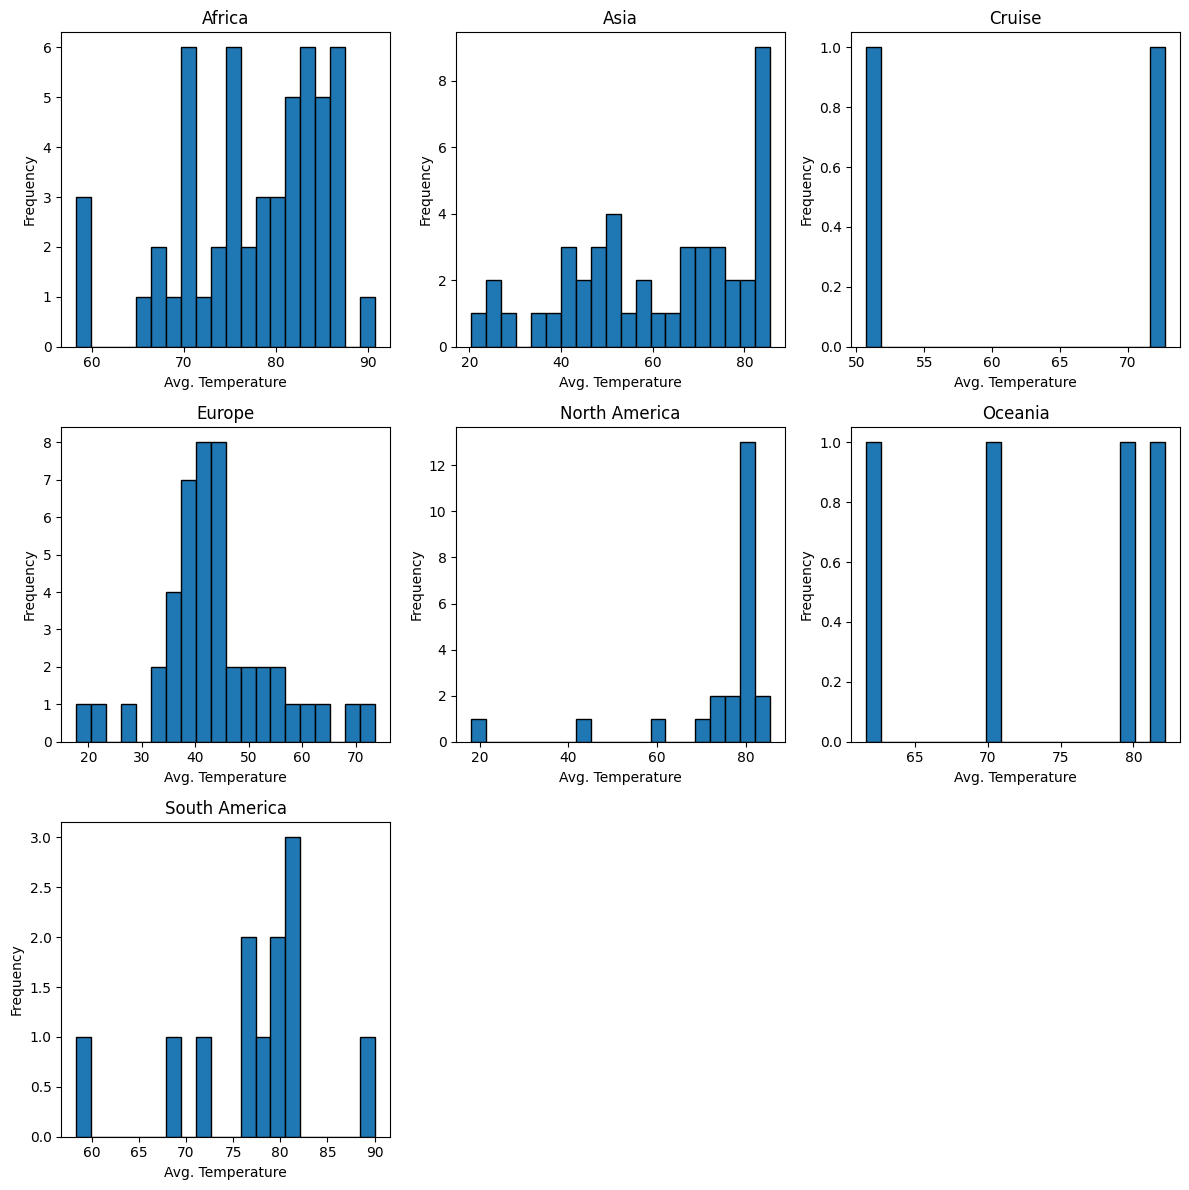

                    mean        std     median
Continent                                     
Africa         77.581156   7.786413  78.630769
Asia           61.027045  19.092485  64.256410
Cruise         61.719872  15.555443  61.719872
Europe         43.567170  10.871114  42.108974
North America  74.128150  15.073801  79.770513
Oceania        73.618550   9.445085  75.330689
South America  76.823397   7.849946  78.894231


In [6]:
import matplotlib.pyplot as plt

# Grouping by continent:
grouped_data = merged_df.groupby('Continent')

# Getting the continent names (including Cruise, which makes it seven)
# Africa, Asia, Europe, North America, Oceania, South America, Cruise]
continents_to_plot = list(grouped_data.groups.keys())[:7]

# Creating histograms for the selected continents and cruise:
plt.figure(figsize=(12, 12))
for i, continent in enumerate(continents_to_plot):
    data = grouped_data.get_group(continent)
    plt.subplot(3, 3, i + 1)
    plt.hist(data['temp'], bins=20, edgecolor='black') 
    plt.title(continent)
    plt.xlabel('Avg. Temperature')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


# Group by 'Continent' and aggregate mean and std
continent_stats = merged_df.groupby('Continent')['temp'].agg(['mean', 'std','median'])
continent_stats = continent_stats.iloc[:7]
print(continent_stats)

In [7]:
merged_df.groupby('Continent')['Country_Region'].count()

Continent
Africa           53
Asia             45
Cruise            2
Europe           45
North America    23
Oceania           4
South America    12
Name: Country_Region, dtype: int64

<hr style="fill: 1px solid white;">
<font face="Arial" size="6.5">Anova Testing (Comparing Mean Temperature Accross Different Continents): </font>
<br> H0: The mean temperatures are the same across all continents 
<br> Ha: At least one continent has a different mean temperature than the others
<br> We want to see if they are different from one another

In [8]:
import scipy.stats as stats

# Drop data points under cruise

grouped_temps = merged_df.groupby('Continent')['temp'].apply(list).to_dict()

temps_by_continent = list(grouped_temps.values())

f, p = stats.f_oneway(*temps_by_continent)
print('f-statistics:', f)
print('p-value:', p)

f-statistics: 32.447050637942574
p-value: 3.46732844969031e-26


<p>- An f-statistic of 32.447 suggest a stronger variance between groups than variance within groups. The variance between groups is 32.447 bigger than the variance within groups.
<br>- Assuming that the null-hypothesis was to hold true, the probability of observing the obtained values will be 3.46732844969031e-26, which is extremely small, so we reject the null hypothesis.</p>

Since we rejet the null hypothesis, we can infer that at least one of the distributions/continents has a statistically significant different in its mean temperature.

***Important To determine which continents are different, a post-hoc test must be run.

<hr style="fill: 1px solid white;">
<font face="Arial" size="6.5"> **Important to do: Anova Testing (Comparing Mean CummulativeCases Accross Different Continents): </font>
<br> H0: The mean temperatures are the same across all continents 
<br> Ha: At least one continent has a different mean temperature than the others
<br> We want to see if they are different from one another

<hr style="fill: 1px solid white;">
<font face="Arial" size="6.5">Histogram of cumulative covid cases vs temperature:</font>

In [ ]:
#The cumulative number of confirmed cases per country as of 2020-04-08

date_filtered_df = df[df['Date'] == '2020-04-08']
country_cases = date_filtered_df.groupby('Country_Region')['ConfirmedCases'].sum().reset_index()

countryByTemperatureSD = df.groupby(['Country_Region'])['temp'].agg(['mean', 'std'])
merged_df = pd.merge(countryByTemperatureSD, country_cases, on='Country_Region', how='left')

merged_df = merged_df.rename(columns={'mean': 'Avg.Temperature', 'ConfirmedCases':'CumulativeCases'})

merged_df.sort_values(by='Avg.Temperature')

C:\Users\14379\AppData\Local\Temp\ipykernel_26384\270378835.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  case_counts_by_bin = merged_df.groupby('TempBin')['CumulativeCases'].sum().reset_index()


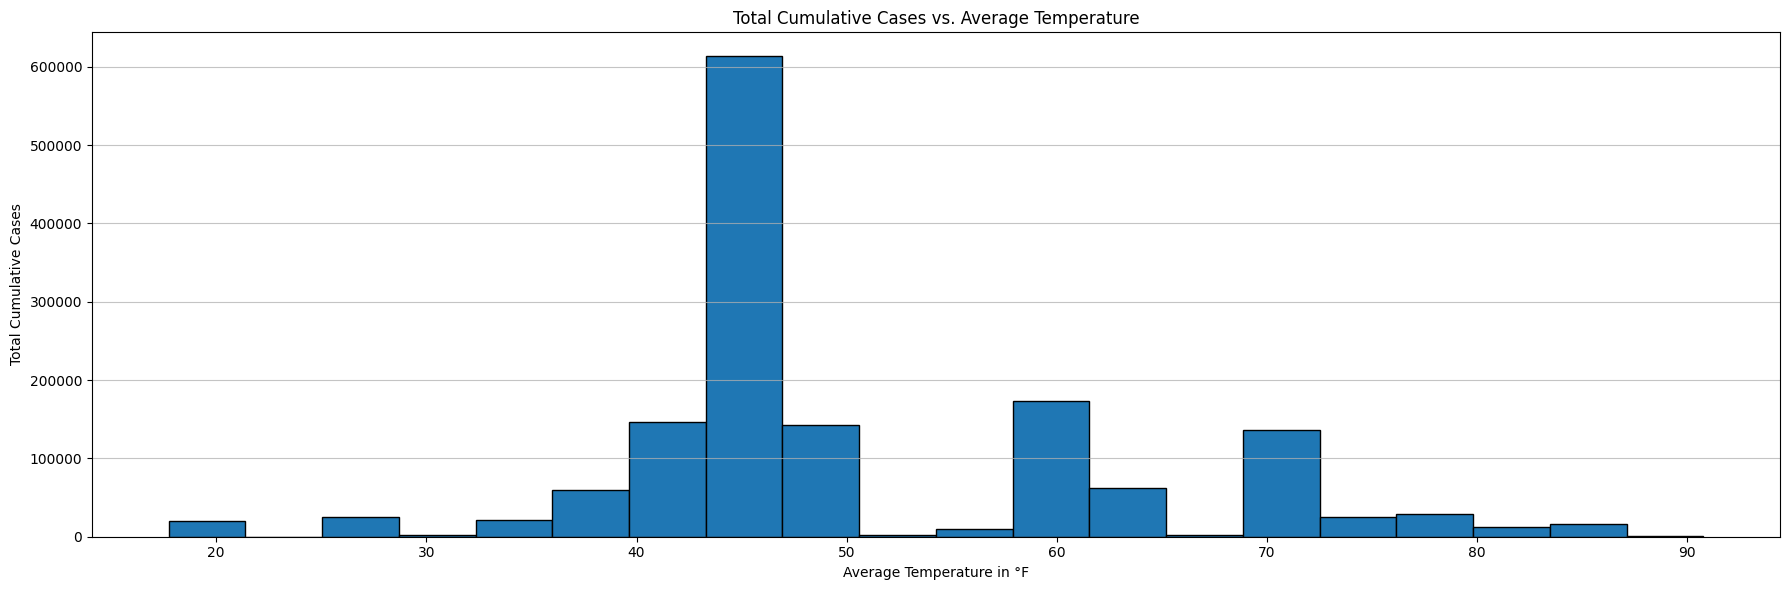

In [10]:
# Using the 'merged_df' dataframe from the previous code bracket with 'Avg.Temperature' and 'CumulativeCases' we can create a histogram with temperature in 
# the horizontal axis and cumulative cases in the vertical axis 

# Defining the temperature bins
bins = pd.interval_range(start=merged_df['Avg.Temperature'].min(), end=merged_df['Avg.Temperature'].max(), periods=20)  # Adjust 'periods' for the number of bins

# Assigning countries to bins
merged_df['TempBin'] = pd.cut(merged_df['Avg.Temperature'], bins=bins)

# Aggregating cases by bin
case_counts_by_bin = merged_df.groupby('TempBin')['CumulativeCases'].sum().reset_index()

# Preparing data for plotting
bin_midpoints = [bin.mid for bin in case_counts_by_bin['TempBin']]
case_counts = case_counts_by_bin['CumulativeCases']

# Creating bar plot
plt.figure(figsize=(18, 6))
plt.bar(bin_midpoints, case_counts, width=(bin_midpoints[1] - bin_midpoints[0]), edgecolor='black')

plt.xlabel('Average Temperature in °F')
plt.ylabel('Total Cumulative Cases')
plt.title('Total Cumulative Cases vs. Average Temperature')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

<p style="font-size: 16pt">Results: We can see that the majority of covid-19 cases occur in colder temperature countries than in warmer temperature. The highest concentration of covid cases is in countries with avg. temperature between 43.29 and 46.94°F (6.27 and 8.30 °C)</p>

In [65]:
# Let's plot the countries with the highest number of covid cases

merged_df[['Country_Region','Avg.Temperature','CumulativeCases']].sort_values('CumulativeCases', ascending=False).head(10)

,Country_Region,Avg.Temperature,CumulativeCases
171,US,43.721273,428889.0
156,Spain,59.758974,148220.0
84,Italy,48.584615,139422.0
61,France,69.923427,113959.0
65,Germany,41.585897,113296.0
36,China,45.351632,82809.0
80,Iran,46.167949,64586.0
175,United Kingdom,63.927156,61474.0
170,Turkey,38.588462,38226.0
16,Belgium,44.443590,23403.0


We can see that the 10 top country with the highest number cases have a temperature floating close to the range of 43.29 to 46.94°F, with France and UK deviating the most

In [66]:
# Let's plot the countries with the highest number of covid cases

merged_df[['Country_Region','Avg.Temperature','CumulativeCases']].sort_values('CumulativeCases').head(10)

,Country_Region,Avg.Temperature,CumulativeCases
166,Timor-Leste,83.084615,1.0
130,Papua New Guinea,82.170513,2.0
155,South Sudan,85.628205,2.0
28,Burundi,77.394872,3.0
144,Sao Tome and Principe,83.010256,4.0
63,Gambia,86.152564,4.0
181,Western Sahara,66.533333,4.0
19,Bhutan,51.241026,5.0
109,Mauritania,69.673077,6.0
122,Nicaragua,82.650000,6.0


Seeing the country with the least number of cases we can see they have warmer weather than the range we recognized in the previous code bracket

In [55]:
import statsmodels.api as sm

# Assuming merged_df is your DataFrame
# Prepare your data
merged_df = merged_df.dropna() # drops any row with a null value.

# Define independent (X) and dependent (y) variables
X = merged_df['Avg.Temperature']
y = merged_df['CumulativeCases']

# Add a constant term (intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        CumulativeCases   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     5.433
Date:                Wed, 02 Apr 2025   Prob (F-statistic):             0.0209
Time:                        17:06:25   Log-Likelihood:                -2184.7
No. Observations:                 183   AIC:                             4373.
Df Residuals:                     181   BIC:                             4380.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3.076e+04   1.01e+04     

From the slope, we can see that for every increase in temperature, cummulative cases are predicted to decrease by 348 cases

<hr style="fill: 1px solid white;">

<font face="Arial" size="6.5"> Let's try all the above, but while preserving Province_State</font>
<br> Maybe with bigger dataset, we will get a greater R-squared 

In [44]:
import numpy as np

df_copy = df

# Preprocessing: Replace NaN values in Province_State with the Country_Region value
df_copy['Province_State'] = np.where(df['Province_State'].isnull(), df['Country_Region'], df['Province_State'])

date_filtered_df = df_copy[df_copy['Date'] == '2020-04-08']
provinces_states_cases = date_filtered_df.groupby('Province_State')['ConfirmedCases'].sum().reset_index()

provinces_states_avgTemperature = date_filtered_df.groupby('Province_State')['temp'].sum().reset_index()

merged_provinces_data = pd.merge(provinces_states_cases, provinces_states_avgTemperature, on='Province_State', how='left')

merged_provinces_data = merged_provinces_data.rename(columns={'Province_State': 'Location', 'temp': 'Avg.Temperature', 'ConfirmedCases':'CumulativeCases'})



C:\Users\14379\AppData\Local\Temp\ipykernel_26384\1284637520.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  case_counts_by_bin = merged_provinces_data.groupby('TempBin')['CumulativeCases'].sum().reset_index()


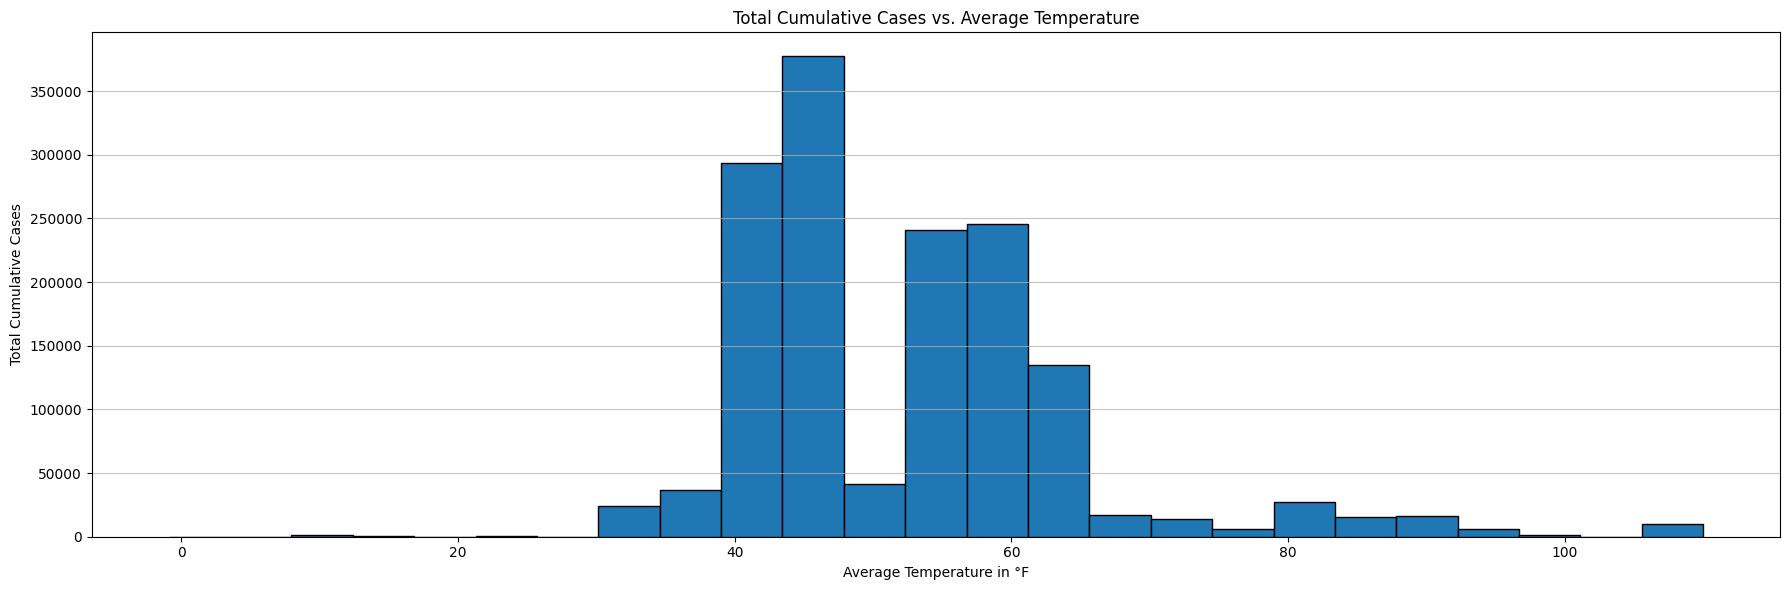

In [47]:
# Using the 'merged_df' dataframe from the previous code bracket with 'Avg.Temperature' and 'CumulativeCases' we can create a histogram with temperature in 
# the horizontal axis and cumulative cases in the vertical axis 

# Defining the temperature bins
bins = pd.interval_range(start=merged_provinces_data['Avg.Temperature'].min(), end=merged_provinces_data['Avg.Temperature'].max(), periods=25)  # Adjust 'periods' for the number of bins

# Assigning countries to bins
merged_provinces_data['TempBin'] = pd.cut(merged_provinces_data['Avg.Temperature'], bins=bins)

# Aggregating cases by bin
case_counts_by_bin = merged_provinces_data.groupby('TempBin')['CumulativeCases'].sum().reset_index()

# Preparing data for plotting
bin_midpoints = [bin.mid for bin in case_counts_by_bin['TempBin']]
case_counts = case_counts_by_bin['CumulativeCases']

# Creating bar plot
plt.figure(figsize=(18, 6))
plt.bar(bin_midpoints, case_counts, width=(bin_midpoints[1] - bin_midpoints[0]), edgecolor='black')

plt.xlabel('Average Temperature in °F')
plt.ylabel('Total Cumulative Cases')
plt.title('Total Cumulative Cases vs. Average Temperature')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

It slightly resembles a bell curve, with a mode/peak between 43.46 and 47.90°F (6.37 and 8.83 °C). It enforces the previous histogram that colder weather countries tend to have higher number of covid cases. At both extremes (closer to 0 and 100°F), we see that the total of cumulative cases diminishes. A possible reason could be that such extreme  conditions are less friendly for human inhabitation.

In [ ]:
import statsmodels.api as sm

merged_provinces_data = merged_provinces_data.dropna()
X = merged_provinces_data['Avg.Temperature']
y = merged_provinces_data['CumulativeCases']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        CumulativeCases   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     6.566
Date:                Wed, 02 Apr 2025   Prob (F-statistic):             0.0109
Time:                        17:06:11   Log-Likelihood:                -3490.8
No. Observations:                 311   AIC:                             6986.
Df Residuals:                     309   BIC:                             6993.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1.384e+04   3653.106     

Having more no. of observations it still showcases that as temperature increase the number of cases decreases by 143.51 case; it can also be said for every temperature point decrease 143.51 more people will get infected.

<hr style="fill: 1px solid white;">


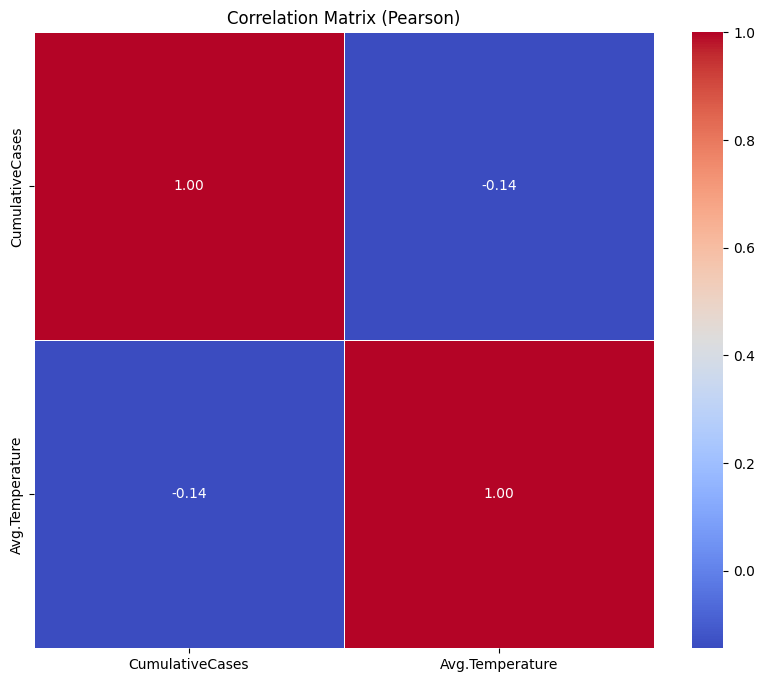

In [101]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_correlation(dataframe, method='pearson', annot=True, figsize=(10, 8)):
    """
    Plots a correlation matrix heatmap for a given DataFrame.
    """

    # Select only the 'CumulativeCases' and 'Avg.Temperature' columns
    numeric_df = dataframe[['CumulativeCases', 'Avg.Temperature']]

    correlation_matrix = numeric_df.corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix ({method.capitalize()})')
    plt.show()

# Example usage (assuming merged_provinces_data exists from prior code).
plot_correlation(merged_provinces_data, method='pearson')

We can see that the correlation is negative

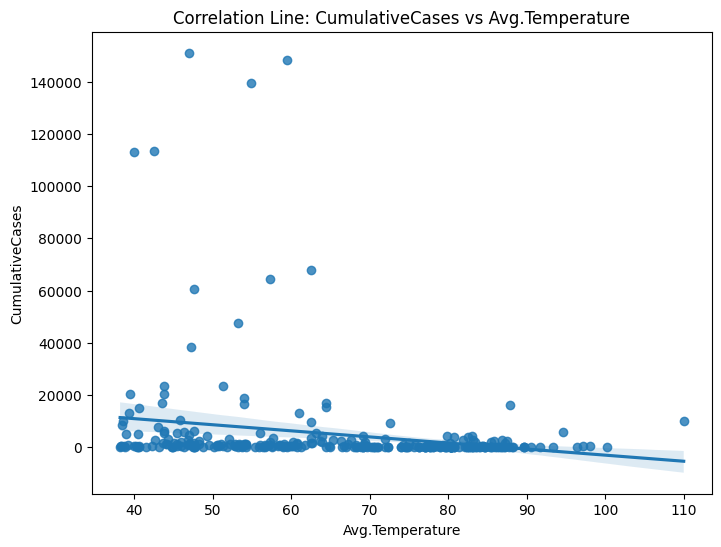

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# filtered_provinces_data = merged_provinces_data[merged_provinces_data['Avg.Temperature'] >= 30]


# def plot_correlation_line(dataframe, x_col, y_col):
#     """
#     Plots a scatter plot with a regression line for two columns in a DataFrame.

#     Args:
#         dataframe (pd.DataFrame): The DataFrame containing the data.
#         x_col (str): The name of the column for the x-axis.
#         y_col (str): The name of the column for the y-axis.
#     """

#     plt.figure(figsize=(8, 6))  # Adjust figure size if needed
#     sns.regplot(x=x_col, y=y_col, data=dataframe)
#     plt.title(f'Correlation Line: {y_col} vs {x_col}')
#     plt.show()

# # Example usage (assuming merged_provinces_data exists and has 'Avg.Temperature' and 'CumulativeCases'):
# plot_correlation_line(filtered_provinces_data, 'Avg.Temperature', 'CumulativeCases')

<hr style="fill: 1px solid white;">
<font face="Arial" size="6.5"> Let's try all the above, but with wind speed</font>


In [124]:
provinces_states_cases = date_filtered_df.groupby('Province_State')['ConfirmedCases'].sum().reset_index()

provinces_states_windSpeed = df.groupby('Province_State')['wdsp'].mean().reset_index()

merged_provinces_data = pd.merge(provinces_states_cases, provinces_states_windSpeed, on='Province_State', how='left')

merged_provinces_data = merged_provinces_data.rename(columns={'Province_State': 'Location', 'wdsp': 'WindSpeed', 'ConfirmedCases':'CumulativeCases'})

C:\Users\14379\AppData\Local\Temp\ipykernel_26384\3770630010.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  case_counts_by_bin = merged_provinces_data.groupby('TempBin')['CumulativeCases'].sum().reset_index()


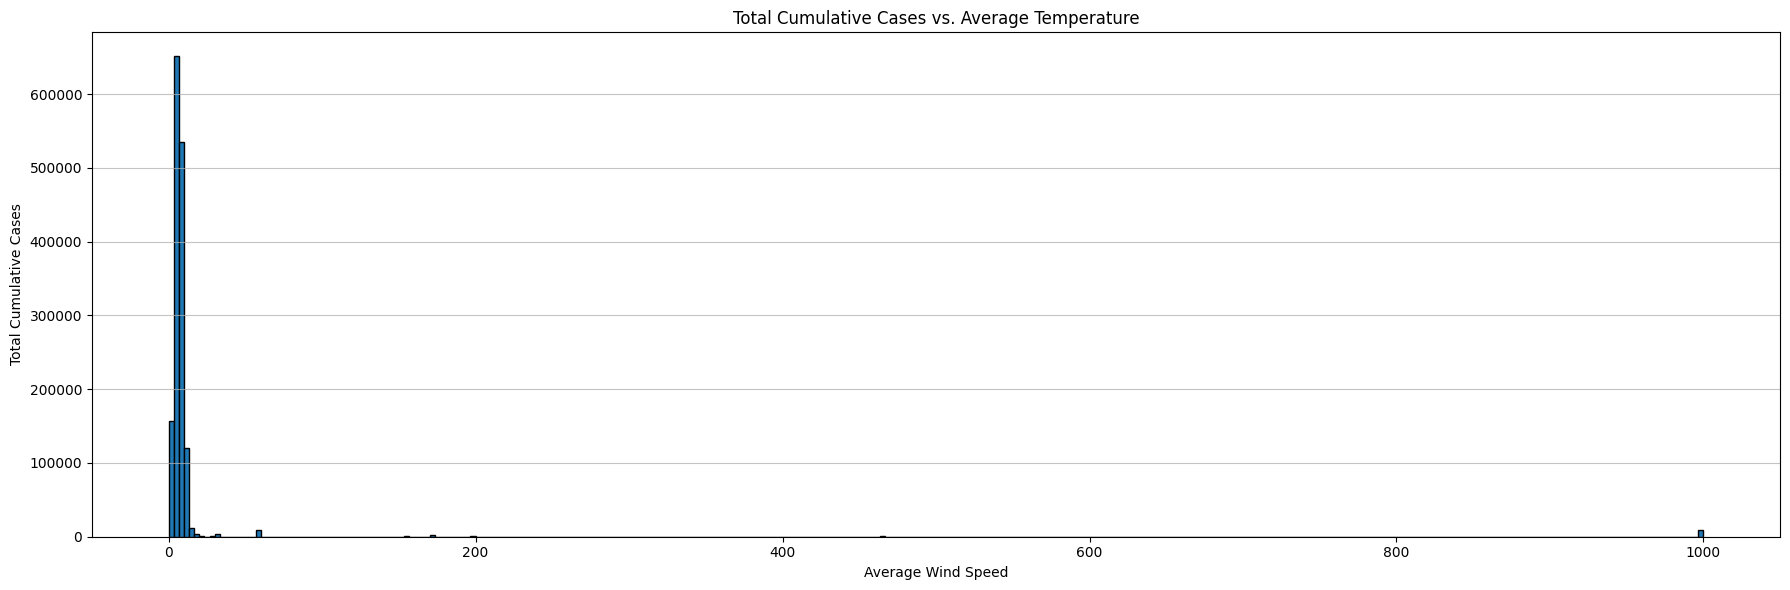

In [127]:
# Using the 'merged_df' dataframe from the previous code bracket with 'Avg.Temperature' and 'CumulativeCases' we can create a histogram with temperature in 
# the horizontal axis and cumulative cases in the vertical axis 

# Defining the temperature bins
bins = pd.interval_range(start=merged_provinces_data['WindSpeed'].min(), end=merged_provinces_data['WindSpeed'].max(), periods=300)  # Adjust 'periods' for the number of bins

# Assigning countries to bins
merged_provinces_data['TempBin'] = pd.cut(merged_provinces_data['WindSpeed'], bins=bins)

# Aggregating cases by bin
case_counts_by_bin = merged_provinces_data.groupby('TempBin')['CumulativeCases'].sum().reset_index()

# Preparing data for plotting
bin_midpoints = [bin.mid for bin in case_counts_by_bin['TempBin']]
case_counts = case_counts_by_bin['CumulativeCases']

# Creating bar plot
plt.figure(figsize=(18, 6))
plt.bar(bin_midpoints, case_counts, width=(bin_midpoints[1] - bin_midpoints[0]), edgecolor='black')

plt.xlabel('Average Wind Speed')
plt.ylabel('Total Cumulative Cases')
plt.title('Total Cumulative Cases vs. Average Temperature')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

In [144]:
merged_provinces_data.sort_values('WindSpeed', ascending = False).head(10)

,Location,CumulativeCases,WindSpeed,TempBin
131,Israel,9404.0,999.900000,"(996.5669999999999, 999.9]"
181,Montana,332.0,999.900000,"(996.5669999999999, 999.9]"
179,Monaco,81.0,744.484615,"(743.2589999999999, 746.592]"
88,Gabon,34.0,525.588462,"(523.281, 526.6139999999999]"
78,Ethiopia,55.0,477.919231,"(476.61899999999997, 479.95199999999994]"
14,Armenia,881.0,463.392308,"(463.287, 466.61999999999995]"
153,Liechtenstein,78.0,297.233333,"(296.637, 299.96999999999997]"
103,Guinea,164.0,282.997436,"(279.972, 283.30499999999995]"
140,Kazakhstan,727.0,199.274359,"(196.647, 199.98]"
217,Panama,2249.0,170.729487,"(169.98299999999998, 173.31599999999997]"


From the data we can see there are some points reaching really high numbers, after closer inspection they contain data stating that they had average windspeed of 999 knots, which is equivalent 1150.9 mph (1851.8 kph), which is faster than the hurricane with the fastest recorded winds, Hurricane Patricia, with speed of 215 mph (345 km/h) and that happened in 2015, not in 2020 which is what all the data is from. Solution: Removing all the data points that are higher than Hurricane Patricia. 

In [ ]:

threshold_knots = 215 / 1.151 # Windspeeds in the dataset are recorded in knots, and one knot is equivalent to 1.151 kmh
filtered_provinces_data = merged_provinces_data[merged_provinces_data['WindSpeed'] <= threshold_knots]

filtered_provinces_data.sort_values('WindSpeed', ascending = False).head(10)

,Location,CumulativeCases,WindSpeed,TempBin
217,Panama,2249.0,170.729487,"(169.98299999999998, 173.31599999999997]"
148,Latvia,577.0,154.575641,"(153.31799999999998, 156.65099999999998]"
180,Mongolia,16.0,71.791026,"(69.993, 73.326]"
234,Russia,8672.0,57.973077,"(56.660999999999994, 59.99399999999999]"
146,Kyrgyzstan,270.0,41.617949,"(39.995999999999995, 43.32899999999999]"
222,Philippines,3870.0,30.089744,"(29.996999999999996, 33.33]"
32,Bosnia and Herzegovina,804.0,29.765385,"(26.663999999999998, 29.996999999999996]"
303,Western Sahara,4.0,24.744872,"(23.331, 26.663999999999998]"
256,Slovakia,682.0,22.712821,"(19.997999999999998, 23.331]"
206,North Macedonia,617.0,21.329487,"(19.997999999999998, 23.331]"


In [150]:
# We decided to remove Panama and Latvia from the list because it had dirty data

filtered_provinces_data = filtered_provinces_data[filtered_provinces_data['Location'] != 'Panama']
filtered_provinces_data = filtered_provinces_data[filtered_provinces_data['Location'] != 'Latvia']


C:\Users\14379\AppData\Local\Temp\ipykernel_26384\2024657591.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  case_counts_by_bin = filtered_provinces_data.groupby('TempBin')['CumulativeCases'].sum().reset_index()


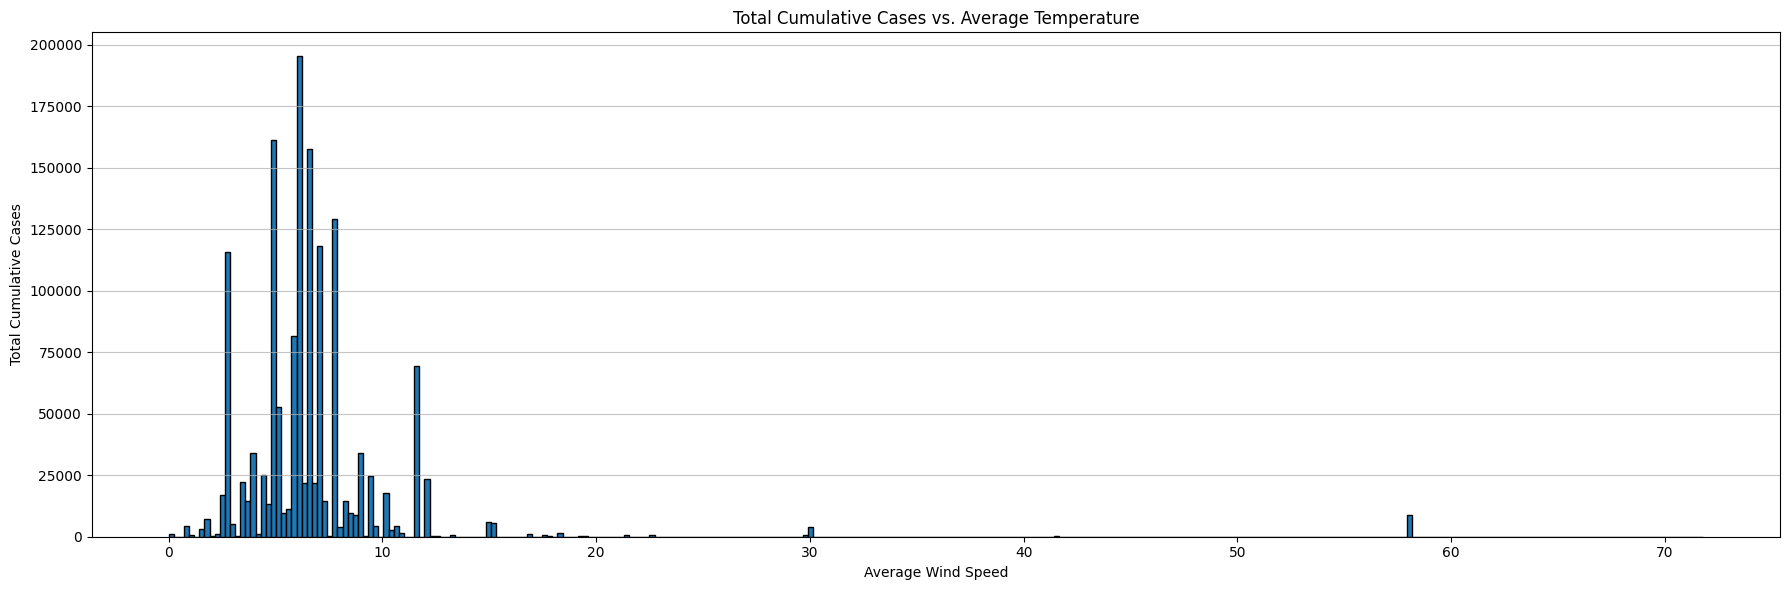

In [151]:
# Using the 'merged_df' dataframe from the previous code bracket with 'Avg.Temperature' and 'CumulativeCases' we can create a histogram with temperature in 
# the horizontal axis and cumulative cases in the vertical axis 

# Defining the temperature bins
bins = pd.interval_range(start=filtered_provinces_data['WindSpeed'].min(), end=filtered_provinces_data['WindSpeed'].max(), periods=300)  # Adjust 'periods' for the number of bins

# Assigning countries to bins
filtered_provinces_data['TempBin'] = pd.cut(filtered_provinces_data['WindSpeed'], bins=bins)

# Aggregating cases by bin
case_counts_by_bin = filtered_provinces_data.groupby('TempBin')['CumulativeCases'].sum().reset_index()

# Preparing data for plotting
bin_midpoints = [bin.mid for bin in case_counts_by_bin['TempBin']]
case_counts = case_counts_by_bin['CumulativeCases']

# Creating bar plot
plt.figure(figsize=(18, 6))
plt.bar(bin_midpoints, case_counts, width=(bin_midpoints[1] - bin_midpoints[0]), edgecolor='black')

plt.xlabel('Average Wind Speed')
plt.ylabel('Total Cumulative Cases')
plt.title('Total Cumulative Cases vs. Average Temperature')
plt.grid(axis='y', alpha=0.75)

plt.tight_layout()
plt.show()

We can see that it is resembling a normal distribution

In [156]:
import statsmodels.api as sm

X = filtered_provinces_data['WindSpeed']
y = filtered_provinces_data['CumulativeCases']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        CumulativeCases   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.4431
Date:                Wed, 02 Apr 2025   Prob (F-statistic):              0.506
Time:                        21:12:04   Log-Likelihood:                -3386.1
No. Observations:                 301   AIC:                             6776.
Df Residuals:                     299   BIC:                             6784.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5812.1691   1658.945      3.504      0.0

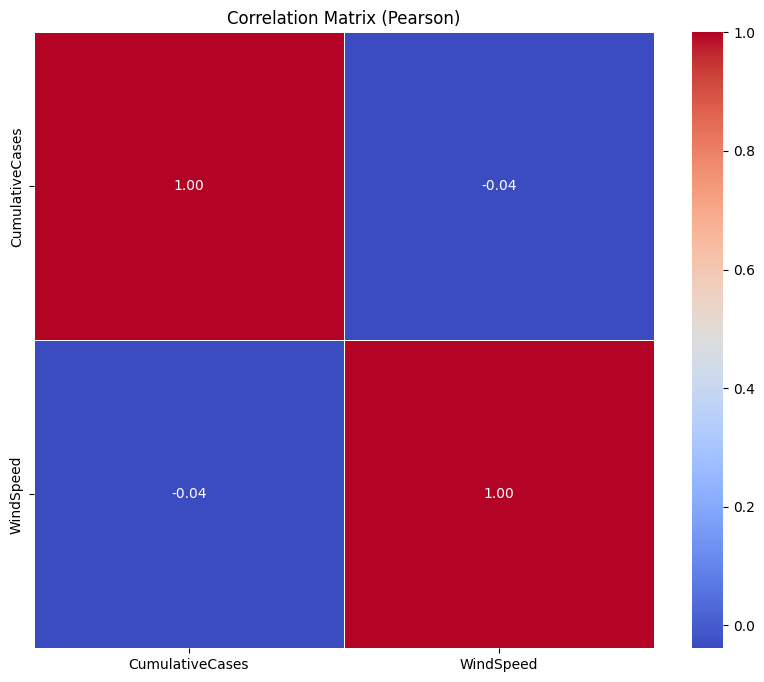

In [157]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

def plot_correlation(dataframe, method='pearson', annot=True, figsize=(10, 8)):
    """
    Plots a correlation matrix heatmap for a given DataFrame.
    """

    # Select only the 'CumulativeCases' and 'Avg.Temperature' columns
    numeric_df = dataframe[['CumulativeCases', 'WindSpeed']]

    correlation_matrix = numeric_df.corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=annot, cmap='coolwarm', fmt=".2f", linewidths=.5)
    plt.title(f'Correlation Matrix ({method.capitalize()})')
    plt.show()

# Example usage (assuming merged_provinces_data exists from prior code).
plot_correlation(filtered_provinces_data, method='pearson')

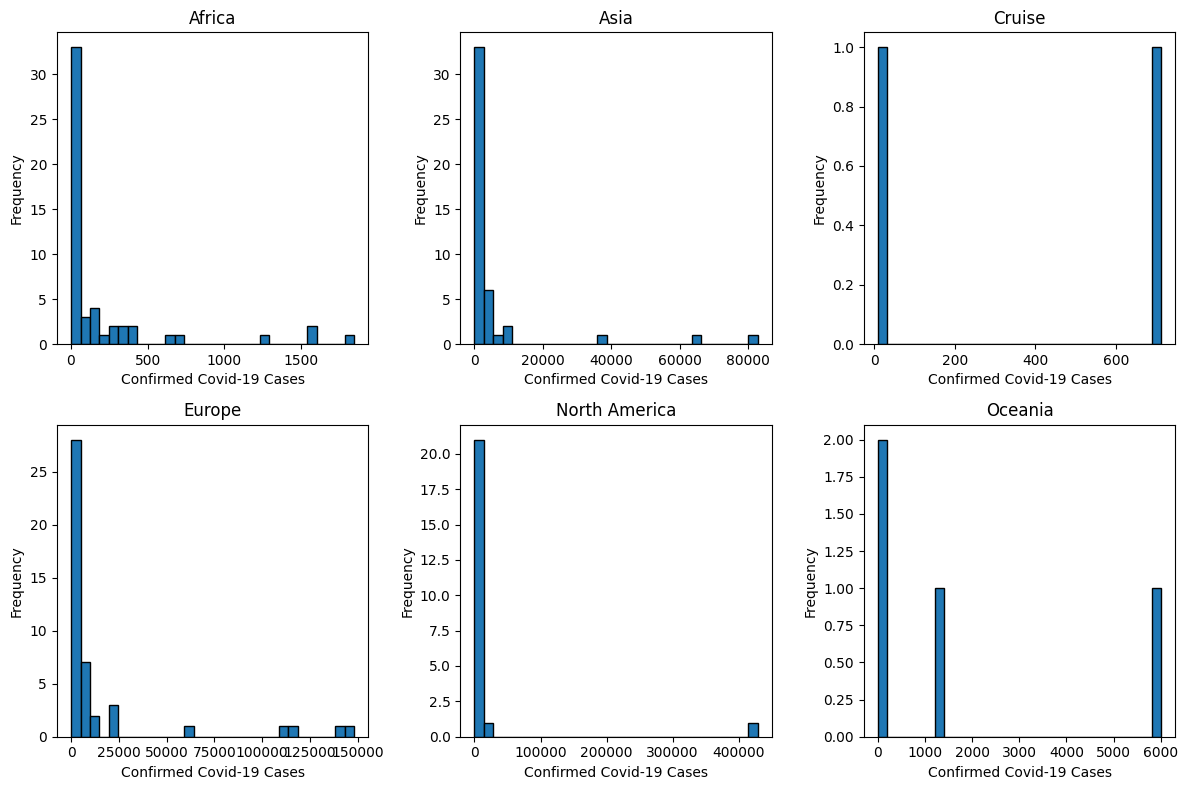

In [74]:
import matplotlib.pyplot as plt

# 1. Group the data by continent:
grouped_data = merged_df_with_Continent.groupby('Continent')

# 2. Manually select the first 6 continents (or fewer if there are less):
continents_to_plot = list(grouped_data.groups.keys())[:6]  # Get the first 6 continent names

# 3. Create histograms for the selected continents:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, continent in enumerate(continents_to_plot):
    data = grouped_data.get_group(continent)
    plt.subplot(2, 3, i + 1)  # Create subplots in a 2x3 grid
    plt.hist(data['ConfirmedCases'], bins=30, edgecolor='black') 
    plt.title(continent)
    plt.xlabel('Confirmed Covid-19 Cases')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [119]:
# Anova Testing

import scipy.stats as stats

grouped_ConfirmedCases = merged_df_with_Continent.groupby('Continent')['ConfirmedCases'].apply(list).to_dict()

ConfirmedCases_by_continent = list(grouped_ConfirmedCases.values())

f_statistic, p_value = stats.f_oneway(*ConfirmedCases_by_continent)

print('F-value', f_statistic)
print('P-value', p_value)

F-value 1.2612195994264832
P-value 0.2776355152470686


In [120]:
# Anova Testing
# But without Oceania and Cruise from the dataset

import scipy.stats as stats

filtered_df = merged_df_with_Continent[~merged_df_with_Continent['Continent'].isin(['Oceania', 'Cruise'])]

grouped_ConfirmedCases = filtered_df.groupby('Continent')['ConfirmedCases'].apply(list).to_dict()

ConfirmedCases_by_continent = list(grouped_ConfirmedCases.values())

f_statistic, p_value = stats.f_oneway(*ConfirmedCases_by_continent)

print('F-value', f_statistic)
print('P-value', p_value)


F-value 1.7974468866731812
P-value 0.1314709346959179


In [83]:
import requests

def add_population_2019_to_dataframe(df):

    population_data = {}

    for country in df['Country_Region'].unique():
        try:
            # Get country code from REST Countries API
            country_code_url = f"https://restcountries.com/v3.1/name/{country}"
            country_code_response = requests.get(country_code_url)
            country_code_response.raise_for_status()
            country_code_data = country_code_response.json()
            country_code = country_code_data[0]['cca3']  # Get the 3-letter country code

            # Get population data from World Bank API for 2019
            world_bank_url = f"http://api.worldbank.org/v2/country/{country_code}/indicator/SP.POP.TOTL?date=2019&format=json"
            world_bank_response = requests.get(world_bank_url)
            world_bank_response.raise_for_status()
            world_bank_data = world_bank_response.json()

            if world_bank_data[1]:  # Check if data exists
                population_data[country] = world_bank_data[1][0]['value']
            else:
                population_data[country] = None  # No population data for 2019

        except requests.exceptions.RequestException as e:
            print(f"Error fetching population for {country}: {e}")
            population_data[country] = None
        except (KeyError, IndexError) as e:
            print(f"Error parsing population data for {country}: {e}")
            population_data[country] = None

    df['Population'] = df['Country_Region'].map(population_data)
    return df

In [84]:
merged_df_with_population = add_population_2019_to_dataframe(merged_df.copy())
print(merged_df_with_population)

Error fetching population for Congo (Brazzaville): 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Congo%20(Brazzaville)
Error fetching population for Congo (Kinshasa): 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Congo%20(Kinshasa)
Error fetching population for Cote d'Ivoire: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Cote%20d'Ivoire
Error fetching population for Diamond Princess: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Diamond%20Princess
Error parsing population data for Georgia: list index out of range
Error parsing population data for Holy See: list index out of range
Error fetching population for Korea, South: 404 Client Error: Not Found for url: https://restcountries.com/v3.1/name/Korea,%20South
Error parsing population data for Kosovo: list index out of range
Error fetching population for MS Zaandam: 404 Client Error: Not Found for url: https://restcountries.com/v3

In [85]:
# Data from Worldometers of population of the following country on 2019

population_2019_data = {
        "China": 1426106093,
        "Congo (Brazzaville)": 5752791,  
        "Congo (Kinshasa)": 95989998, 
        "Cote d'Ivoire": 28915449,  
        "Diamond Princess": 3711, 
        "Georgia": 3795678,  
        "Holy See": 528,  
        "Korea, South": 51858482,  
        "Kosovo": 1788891,  
        "MS Zaandam": 1829,
        "Taiwan*": 23663459,   
        "West Bank and Gaza": 5069692,  
        "Western Sahara": 549365, 
    }



In [86]:
for country, population in population_2019_data.items():
    merged_df_with_population.loc[merged_df_with_population['Country_Region'] == country, 'Population'] = population

In [87]:
merged_df_with_population

,Country_Region,mean,std,ConfirmedCases,Population
0,Afghanistan,35.579487,10.830817,444.0,3.785612e+07
1,Albania,52.632051,4.839220,400.0,2.854191e+06
2,Algeria,70.260256,4.207209,1572.0,4.329455e+07
3,Andorra,34.702564,5.388274,564.0,7.647400e+04
4,Angola,82.639744,1.202955,19.0,3.237563e+07
5,Antigua and Barbuda,77.465385,1.166728,19.0,9.136400e+04
6,Argentina,71.046154,7.124290,1715.0,4.497346e+07
7,Armenia,28.620513,9.263829,881.0,2.962500e+06
8,Australia,70.576763,9.789587,6010.0,2.533483e+07
9,Austria,35.939744,5.834589,12942.0,8.879920e+06


In [ ]:
# merged_df_with_population = merged_df_with_population.drop('Population_2019', axis=1)

In [89]:
merged_df_with_population['ConfirmedCasesPerCapita'] = merged_df_with_population['ConfirmedCases'] / merged_df_with_population['Population'] * 100
merged_df_with_population.sort_values(by='mean')

,Country_Region,mean,std,ConfirmedCases,Population,ConfirmedCasesPerCapita
138,Russia,17.735897,14.732401,8672.0,1.454533e+08,0.005962
32,Canada,18.103098,15.852638,19128.0,3.761850e+07,0.050847
114,Mongolia,20.391026,13.598120,16.0,3.267673e+06,0.000490
151,Slovakia,21.230769,7.083405,682.0,5.454147e+06,0.012504
88,Kazakhstan,26.141026,13.181593,727.0,1.920956e+07,0.003785
93,Kyrgyzstan,26.241026,15.114656,270.0,6.590211e+06,0.004097
161,Switzerland,27.408974,18.064439,23280.0,8.575280e+06,0.271478
7,Armenia,28.620513,9.263829,881.0,2.962500e+06,0.029738
60,Finland,32.178205,4.577802,2487.0,5.521606e+06,0.045041
46,Denmark,33.032051,15.356081,5597.0,5.814422e+06,0.096261


In [90]:
merged_df = pd.merge(merged_df_with_population, continent_map_df, on='Country_Region', how='left')

In [121]:
# Anova Testing
# But without Oceania and Cruise from the dataset, and covid-19 cases per capita

import scipy.stats as stats

filtered_df = merged_df[~merged_df['Continent'].isin(['Oceania', 'Cruise'])]

grouped_ConfirmedCases = filtered_df.groupby('Continent')['ConfirmedCases'].apply(list).to_dict()

ConfirmedCases_by_continent = list(grouped_ConfirmedCases.values())

f_statistic, p_value = stats.f_oneway(*ConfirmedCases_by_continent)

print('F-value', f_statistic)
print('P-value', p_value)

F-value 1.7974468866731812
P-value 0.1314709346959179


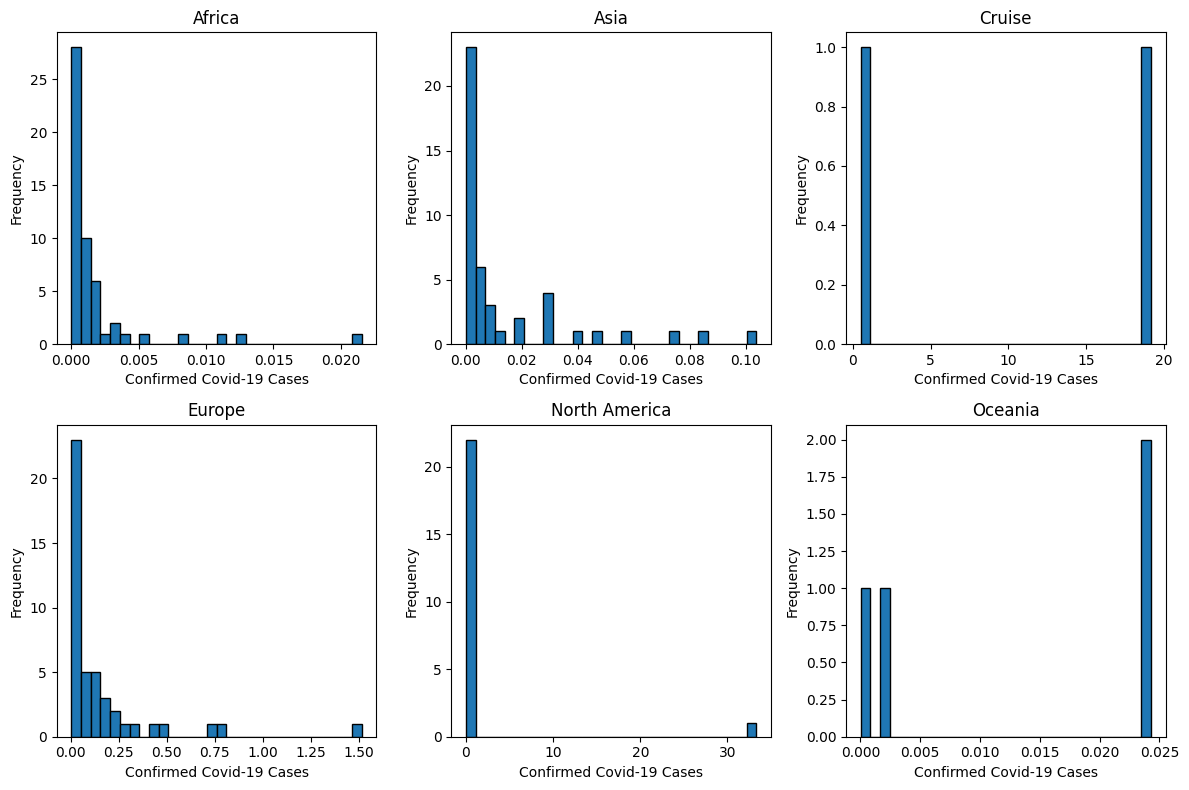

In [94]:
import matplotlib.pyplot as plt

# 1. Group the data by continent:
grouped_data = merged_df.groupby('Continent')

# 2. Manually select the first 6 continents (or fewer if there are less):
continents_to_plot = list(grouped_data.groups.keys())[:6]  # Get the first 6 continent names

# 3. Create histograms for the selected continents:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, continent in enumerate(continents_to_plot):
    data = grouped_data.get_group(continent)
    plt.subplot(2, 3, i + 1)  # Create subplots in a 2x3 grid
    plt.hist(data['ConfirmedCasesPerCapita'], bins=30, edgecolor='black') 
    plt.title(continent)
    plt.xlabel('Confirmed Covid-19 Cases')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [ ]:
import pandas as pd

# Assuming your DataFrame is called merged_df_with_population
# and it has a column called 'mean' (avg. temperature)

def create_temperature_intervals(df, temp_col='mean'):

    bins = [10, 30, 50, 70, 91] # Adjusted bins for the desired intervals
    labels = ['10-30C', '30-50C', '50-70C', '70-91C'] # Adjusted labels for the desired intervals

    df['temperature_interval'] = pd.cut(df[temp_col], bins=bins, labels=labels, right=False) #right=False, so that the right bin edge is exclusive

    return df

temperatureIntervals_merged_df = create_temperature_intervals(merged_df_with_population)

temperatureIntervals_merged_df

C:\Users\14379\AppData\Local\Temp\ipykernel_22292\4122152669.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = temperatureIntervals_merged_df.groupby('temperature_interval')


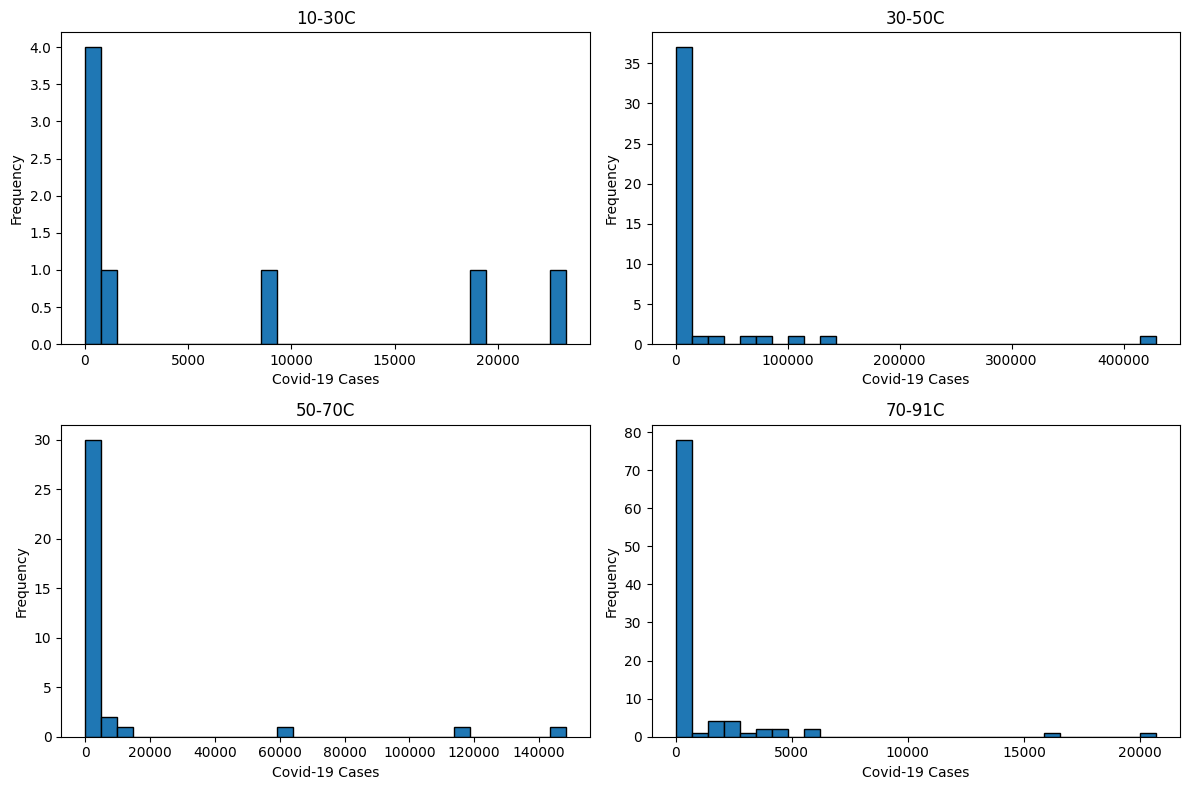

In [114]:
import matplotlib.pyplot as plt

# 1. Group the data by continent:
grouped_data = temperatureIntervals_merged_df.groupby('temperature_interval')

# 2. Manually select the first 6 continents (or fewer if there are less):
continents_to_plot = list(grouped_data.groups.keys())[:8]  # Get the first 6 continent names

# 3. Create histograms for the selected continents:
plt.figure(figsize=(12, 8))  # Adjust figure size as needed

for i, continent in enumerate(continents_to_plot):
    data = grouped_data.get_group(continent)
    plt.subplot(2, 2, i + 1)  # Create subplots in a 2x3 grid
    plt.hist(data['ConfirmedCases'], bins=30, edgecolor='black') 
    plt.title(continent)
    plt.xlabel('Covid-19 Cases')
    plt.ylabel('Frequency')

plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [118]:
import scipy.stats as stats

# filtered_df = temperatureIntervals_merged_df[~temperatureIntervals_merged_df['Continent'].isin(['Oceania', 'Cruise'])]

grouped_ConfirmedCases = temperatureIntervals_merged_df.groupby('temperature_interval')['ConfirmedCases'].apply(list).to_dict()

ConfirmedCases_by_continent = list(grouped_ConfirmedCases.values())

f_statistic, p_value = stats.f_oneway(*ConfirmedCases_by_continent)

print('F-value', f_statistic)
print('P-value', p_value)

F-value 3.472984252054691
P-value 0.017281588566937536


C:\Users\14379\AppData\Local\Temp\ipykernel_22292\3977380812.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_ConfirmedCases = temperatureIntervals_merged_df.groupby('temperature_interval')['ConfirmedCases'].apply(list).to_dict()
